<a href="https://colab.research.google.com/github/l-guilherme/IA/blob/main/titanic_emsembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

data = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

X = data.drop(['Survived','PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)
Xtest = test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)


le = LabelEncoder()
X['Sex'] = le.fit_transform(X['Sex'])
Xtest['Sex'] = le.fit_transform(Xtest['Sex'])

X = imputer.fit_transform(X)
Xtest = imputer.fit_transform(Xtest)

y = data['Survived']

In [ ]:
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(X, y, random_state=42)
Xtr.shape, Xte.shape, ytr.shape, yte.shape

yte

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
880,1
425,0
101,0
199,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
modelo = KNeighborsClassifier()
modelo.fit(Xtr, ytr)
knn_pred = modelo.predict(Xte)
knn_hits = knn_pred == yte
knn_pred, yte, knn_hits, sum(knn_hits)/len(knn_hits)

(array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        0, 0, 0]),
 709    1
 439    0
 840    0
 720    1
 39     1
       ..
 880    1
 425    0
 101    0
 199    0
 424    0
 Name: Survived, Length: 223, dtype: int64,
 709    False
 439     True
 840     True
 720     True
 39     False
        ...  
 88

In [ ]:
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
modelo.fit(Xtr, ytr)
gnb_pred = modelo.predict(Xte)
gnb_hits = gnb_pred == yte
gnb_hits, sum(gnb_hits)/len(gnb_hits)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880     True
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.7802690582959642)

In [ ]:
from sklearn.linear_model import Perceptron
modelo = Perceptron()
modelo.fit(Xtr, ytr)
per_pred = modelo.predict(Xte)
per_hits = per_pred == yte
per_hits, sum(per_hits)/len(per_hits)

(709    False
 439     True
 840     True
 720     True
 39     False
        ...  
 880    False
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.6905829596412556)

In [ ]:
from scipy import stats
import numpy as np
hits = np.stack((knn_hits, gnb_hits, per_hits))

ypred = np.stack((knn_pred, gnb_pred, per_pred))
vote_pred = stats.mode(ypred)[0]
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(709    False
 439     True
 840     True
 720     True
 39     False
        ...  
 880    False
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.7533632286995515)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier()
modelo.fit(Xtr, ytr)
dtc_pred = modelo.predict(Xte)
dtc_hits = dtc_pred == yte
dtc_hits, sum(dtc_hits)/len(dtc_hits)

(709    False
 439    False
 840     True
 720     True
 39      True
        ...  
 880    False
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.7533632286995515)

In [ ]:
from sklearn.ensemble import VotingClassifier
modelo = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('per', Perceptron())
])
modelo.fit(Xtr, ytr)
vote_pred = modelo.predict(Xte)
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

(709    False
 439     True
 840     True
 720     True
 39     False
        ...  
 880    False
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.7533632286995515)

In [ ]:
from sklearn.ensemble import VotingClassifier
modelo = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('per', Perceptron()),
    ('dtc', DecisionTreeClassifier())
])
modelo.fit(Xtr, ytr)
vote_pred = modelo.predict(Xte)
vote_hits = vote_pred == yte
vote_hits, sum(vote_hits)/len(vote_hits)

submission = pd.read_csv('gender_submission.csv')

ypred = modelo.predict(Xtest)
submission['Survived'] = ypred
submission.to_csv('guilherme_emsemble_voting_submission.csv', index=False)

(709    False
 439     True
 840     True
 720     True
 39     False
        ...  
 880    False
 425     True
 101     True
 199     True
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.757847533632287)

In [ ]:
from sklearn.ensemble import BaggingClassifier
modelo = BaggingClassifier(DecisionTreeClassifier(splitter='random'),
                           n_estimators=80, max_features=0.18, random_state=42)
modelo.fit(Xtr, ytr)
bag_pred = modelo.predict(Xte)
bag_hits = bag_pred == yte
bag_hits, sum(bag_hits)/len(bag_hits)

submission = pd.read_csv('gender_submission.csv')

ypred = modelo.predict(Xtest)
submission['Survived'] = ypred
submission.to_csv('guilherme_emsemble_bagging_submission.csv', index=False)

(709    False
 439     True
 840     True
 720     True
 39      True
        ...  
 880    False
 425     True
 101     True
 199    False
 424     True
 Name: Survived, Length: 223, dtype: bool,
 0.7219730941704036)

In [60]:
# import warnings
# warnings.filterwarnings('ignore')

from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

voting = VotingClassifier([
    ('knn', KNeighborsClassifier()),
    ('gnb', GaussianNB()),
    ('per', Perceptron())
])

modelo = StackingClassifier([
    ('voting', voting),
    ('extrat', ExtraTreesClassifier()),
    ('ranfor', RandomForestClassifier())
], cv=3, passthrough=True)

modelo.fit(Xtr, ytr)
stack_pred = modelo.predict(Xte)
stack_hits = stack_pred == yte
stack_hits, sum(stack_hits)/len(stack_hits)

submission = pd.read_csv('gender_submission.csv')

ypred = modelo.predict(Xtest)
submission['Survived'] = ypred
submission.to_csv('guilherme_stacking_submission.csv', index=False)

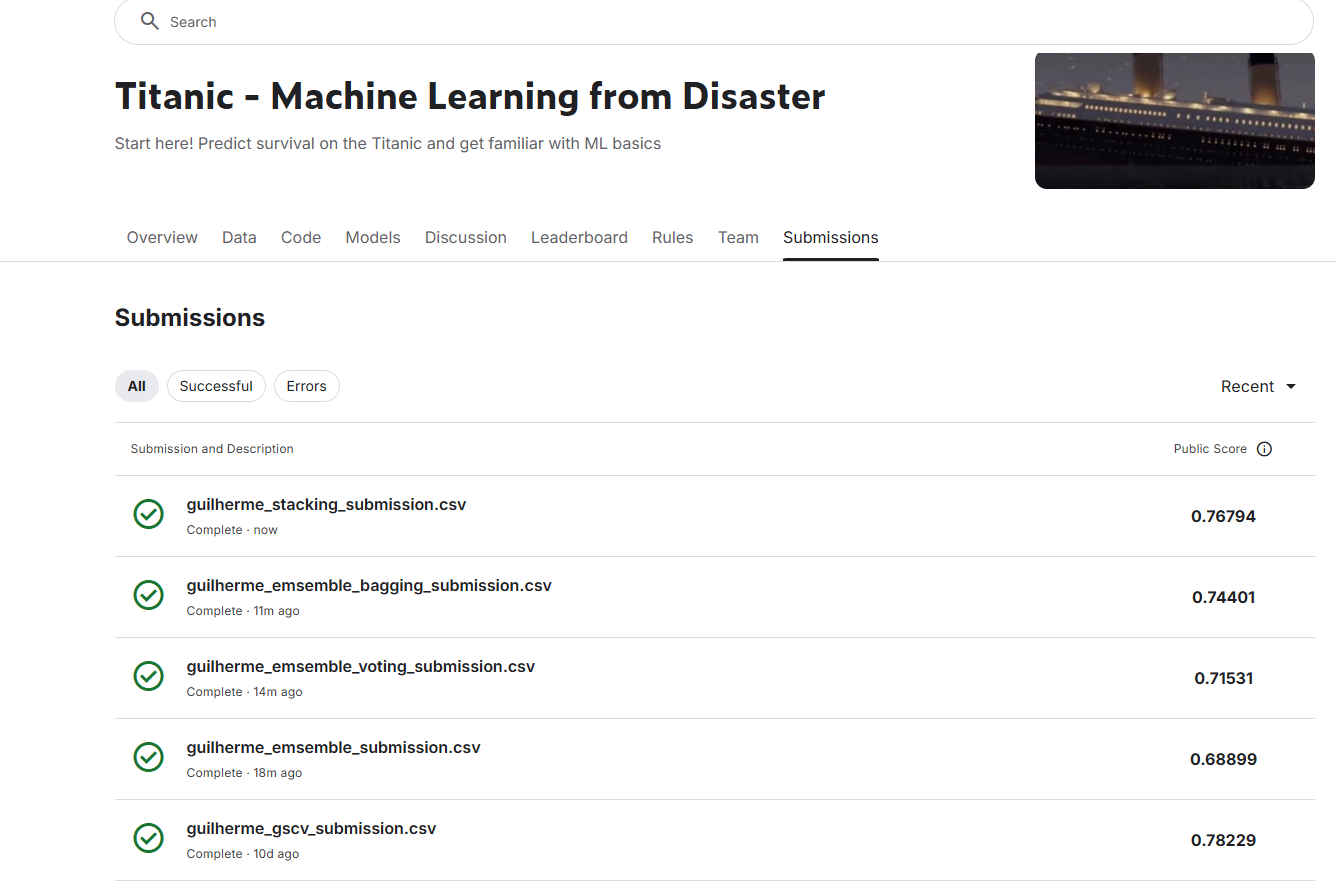